# Write a driver for hls ip
给hls ip写一个上层驱动

In [1]:
from pynq import DefaultIP

class FirDriver(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)
    
    bindto = ['xilinx.com:hls:fir:1.0']
    
    @property
    def x(self):
        return self.read(0x10)
    
    @x.setter
    def x(self, value):
        self.write(0x10, value)

# Import Overlay
导入Overlay

In [1]:
import pynq.lib.dma
import numpy as np

firol = pynq.Overlay("fir.bit")

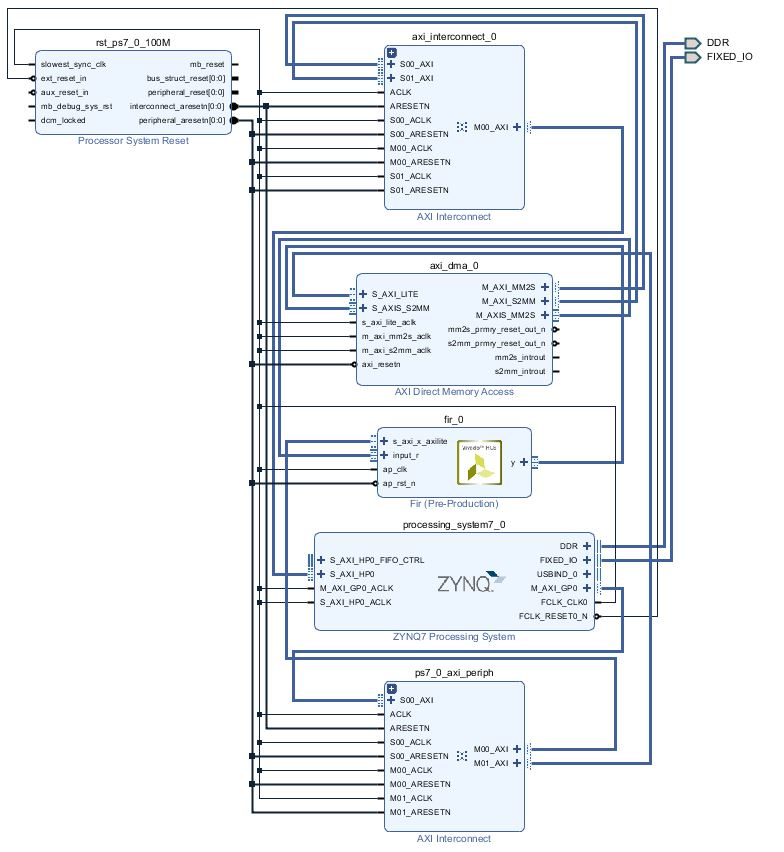

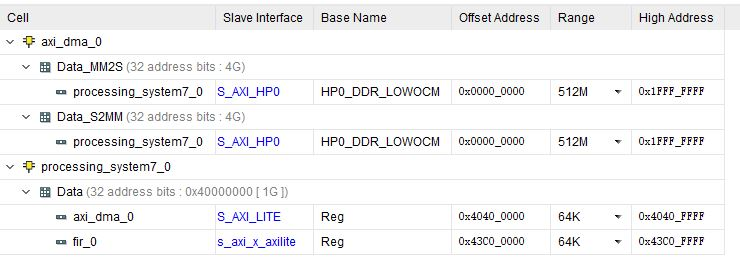

# Convolution of coefficient h[] of n-order FIR filter with input signal x[] can be expressed by difference equation
N-阶FIR滤波器的系数h[]与输入信号x[]的卷积可由差分方程表示：

$$
y[i]=\sum_{j=0}^{N-1}h[j]\cdot x[i-j]\quad(2.1)
$$

In [3]:
# dma = overlay.const_multiply.multiply_dma
# multiply = overlay.const_multiply.multiply

dma = firol.axi_dma_0
f = firol.fir_0


from pynq import Xlnk

xlnk = Xlnk()
in_buffer = xlnk.cma_array(shape=(11,), dtype=np.uint32)
out_buffer = xlnk.cma_array(shape=(11,), dtype=np.uint32)


for i in range(11):
    in_buffer[i] = 1

filt = [1,0,-1,0,2,3,2,0,-1,0,1]
actualfilt = [53,0,-91,0,313,500,313,0,-91,0,53]
f.x = 2
dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
out_buffer

ContiguousArray([ 0,  2,  2,  0,  0,  4, 10, 14, 14, 12, 12], dtype=uint32)

# drawing
画图

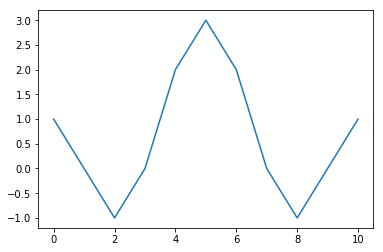

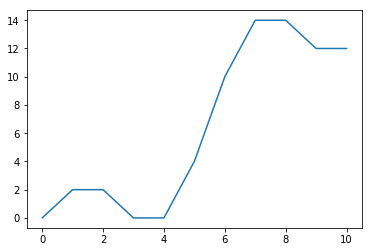

In [5]:
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy.fft


fig1 = plt.figure()
ax1 = fig1.gca()
plt.plot(filt)

fig2 = plt.figure()
ax2 = fig2.gca()
plt.plot(out_buffer)


# FFT transformation, view the waveform
进行FFT变换，查看波形

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


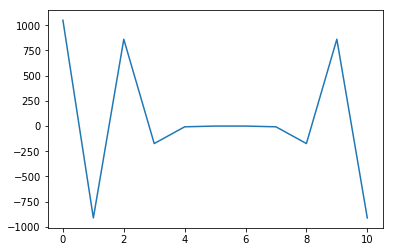

In [6]:
out = scipy.fftpack.fft(actualfilt)
plt.plot(out)

In [7]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of programmatic
    plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, hold=None, data=None, **kwargs)
        Plot the autocorrelation of `x`.
        
        Parameters
        ----------
        
        x : sequence of scalar
        
        hold : boolean, optional, *deprecated*, default: True
        
        detrend : callable, optional, default: `mlab.detrend_none`
            x is detrended by the `detrend` callable. Default is no
            normalization.
        
        normed : boolean